In [1]:
%matplotlib inline
from aps_figures.aps_one_column import *
import sys
sys.path.append('../')
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
def plot_mbtrack2(ax, ax_fft, filename='../data/test/beam_monitor.hdf5'):
    f = hp.File(filename)
    # f = hp.File('../data/test/beam_monitor.hdf5')
    
    mean_y = f['Beam']['mean'][2,:,:].flatten(order='F')
    sigma_y = f['Beam']['std'][2,:,:].flatten(order='F')
    sigma_x = f['Beam']['std'][0,:,:].flatten(order='F')
    print(sigma_x[0], sigma_y[0])
    last_turn = f['Beam']['mean'][0,0,:].shape[0]
    f.close()
    print(mean_y)
    turns = np.linspace(0, last_turn, last_turn*416)
    ax.plot(turns, mean_y/sigma_y[0], label='mbtrack2')
    
    # f = hp.File('beam_monitor.hdf5')
    # mean_y = f['Beam']['mean'][2,0,:]
    # f.close()
    yF = np.abs(np.fft.rfft(mean_y))
    yfreq =416*np.fft.rfftfreq(mean_y.shape[0])
    ax_fft.plot(yfreq, yF/np.max(yF), label=None)

/home/gubaidulin/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/gubaidulin/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def plot_pyht(ax, ax_fft):
    def get_bunch_data(index):
        f = hp.File('../data/test/BM(n_bunch={0:}).h5'.format(index))
        mean_y = f['Bunch']['mean_y'][:]
        f.close()
        return mean_y
    f = hp.File('../data/test/BM(n_bunch={0:}).h5'.format(0))
    sigma_y = f['Bunch']['sigma_y'][0] 
    sigma_x = f['Bunch']['sigma_x'][0] 
    
    last_turn = f['Bunch']['mean_y'].shape[0]
    f.close()
    means = np.empty(shape=(416, last_turn))
    for i in range(416):
        means[i] = get_bunch_data(i)
    mean_y_beam = means.flatten(order='F')
    turns = np.linspace(0, last_turn, last_turn*416)
    ax.plot(turns, mean_y_beam/sigma_y, label='PyHT', alpha=0.5)
    yF = np.abs(np.fft.rfft(mean_y_beam))
    yfreq = 416*np.fft.rfftfreq(mean_y_beam.shape[0])
    ax_fft.plot(yfreq, yF/np.max(yF), label=None)

1.630095993869463e-05 1.018377999590789e-05
[-1.01081996e-09  6.64100124e-10 -1.73317331e-09 ...  1.03218796e-07
 -6.97971171e-08 -1.68584858e-07]
1.630148416708867e-05 1.0186240969689971e-05
[ 0.00000000e+00  2.60208521e-22 -2.16840434e-23 ... -4.34976966e-08
 -9.58498647e-09  7.37802392e-08]


Text(0, 0.5, 'Beam c.\\,m. offset, $y/\\sigma_y$')

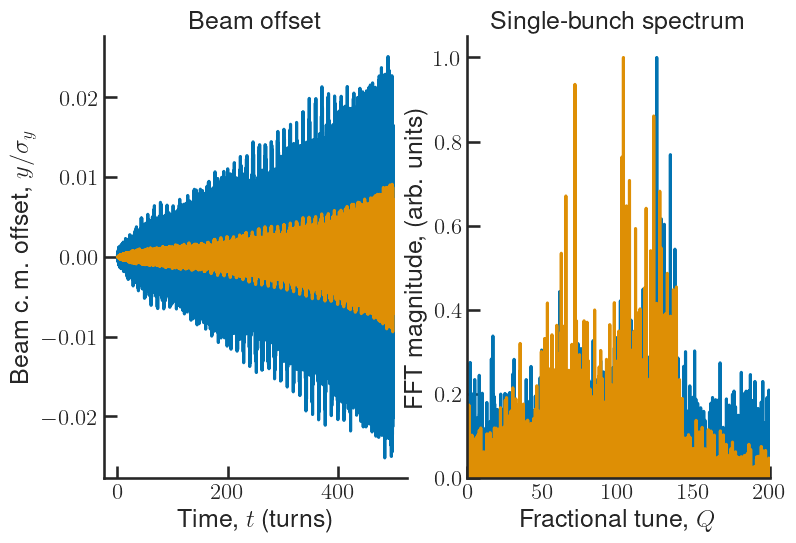

In [11]:
%matplotlib inline
fig, (ax, ax_fft) = plt.subplots(1, 2)
I=500

plot_mbtrack2(ax, ax_fft, filename='../src/simulation/beam_monitor(Ib=500mA,n_macroparticles=5.0e+03,n_turns=500,n_gaps=4,gap_length=1,n_segments=1,charge_var=0,smooth=True,average_pressure=3.9e+12).hdf5')
plot_mbtrack2(ax, ax_fft, filename='../src/simulation/beam_monitor(Ib=500mA,n_macroparticles=5.0e+03,n_turns=500,n_gaps=4,gap_length=1,n_segments=1,charge_var=0,smooth=True,average_pressure=3.9e+12,sr=False).hdf5')

# plot_mbtrack2(ax, ax_fft)

# plot_pyht(ax, ax_fft)
ax_fft.set_xlabel('Fractional tune, $Q$')
ax_fft.set_ylabel('FFT magnitude, (arb. units)')
ax_fft.title.set_text('Single-bunch spectrum')
ax_fft.set_ylim(0, )
ax_fft.set_xlim(0, 200)
# ax.set_xlim(0, 100)
# ax.set_ylim(-.05, .05)

ax.title.set_text('Beam offset')
ax.set_xlabel('Time, $t$ (turns)')
ax.set_ylabel('Beam c.\,m. offset, $y/\sigma_y$')
# plt.figlegend(loc='center right')